# **TP3** : Spin Boson Hamiltonian (SBH) - PES Modelling Laboratory

The adiabatic SBH model represents two-state systems (such as spin), which is coupled to a surrounding environment. The environment represents that of a harmonic oscillator, which are called bosons, hence the name of the model.

The SBH model is used to calculate potential energy surface for a given particle, which is given by a series of analytical functions, hence it is used to calculate many properties such as coupling, energies, and energy gradients. Since the functions in the model are analytical the Schrodinger equation does not need to be solved in order to obtain these properties.

The SBH model is given as the equation below for a two state system coupled to N harmonic oscillators. This gives two adiabatic PES's which represents the ground state potential energy (i=1) and the excited state potential energy (i=2). R are the nuclear co-ordinates.

$$ E_i = \frac{1}{2}  \sum_{j=1}^{N}  M_j \omega_j^2 R_j^2 + (-1)^i [\eta^2 + \nu_0^2]^\frac{1}{2} \; \; \; \; \; \; \;           (i=1,2) \;\;\;\;\;\; eq.[1] $$

where

$$ \eta = (\sum_{j=1}^{N} g_j R_j + \varepsilon_0) $$


Computing the derivative provides the potential energy gradient of the two adiabatic states, which is given as the following:

$$ \frac{\partial E_i}{\partial R_k} =  M_j \omega_j^2 R_j^2 + (-1)^i g_k \frac {\eta}{[\eta^2 + \nu_0^2]^\frac{1}{2}} \; \; \; \; \; \; \;           (i=1,2; \; k=1 ...N) \;\;\;\;\;\; eq.[2] $$

In this coding lab, the SBH model is reduced down to one dimension and to its lowest energy state:

$$ (i=1; N=1) $$

The energy and energy gradient will be computed for a given input of the nuclear geometry. A graph of each energy against nuclear co-ordinates R will be produced, which will then be used to locate the minimun of the two parabolic shapes in the potential energy surface.


$$\;$$
$$\;$$
**Task 1**: $$\;$$
_1.1_: Compute the adaibatic SBH model's energy for the lowest state (i=1) and in one dimension (N=1). 

From the equation [1], we can obtain the SBH model's energy in 1D using the given restrictions:

$$ E_i = \frac{1}{2}  M_1 \omega_1^2 R_1^2 + (-1)^i [\eta^2 + \nu_0^2]^\frac{1}{2} \; \; \; \; \; \; \;           (i=1) \;\;\;\;\;\; eq.[3]$$
where

$$ \eta = ( g_1 R_1 + \varepsilon_0) $$

In [4]:
import numpy as np
# Varaibles from table 1
M_1 = 1836
omega_1 = 0.01136364  
g_1 = 0.22      
e_0 = 0.03674933          
v_0 = 0.03674933             


# Function to calculate energy E_i
def sbh_energy(R_1):
    # First term: sum over (1/2 * M_j * omega_j^2 * R_j^2)
    energy_term_1 = 0.5 * (M_1 * omega_1**2 * R_1**2)

    # Second term: (-1)^i * [eta^2 + v_0^2]^(1/2)
    eta = g_1 * R_1 + e_0
    energy_term_2 = (-1)**1 * np.sqrt(eta**2 + v_0**2) #i = 1 for the lowest state
    
    # Total energy E_i
    E_i = energy_term_1 + energy_term_2
    return E_i

# Input
R_1 = 1 # Example geometry 

# Calculate energy E_i for a given geometry 
E_i = sbh_energy(R_1)
print(f'Energy E_i for the given geometry: {E_i}')


Energy E_i for the given geometry: -0.14082255450774128



$$\;$$
**Task 1**: $$\;$$
_1.2_: Compute the adaibatic SBH model's energy gradient for the lowest state (i=1) and in one dimension (N=1). 

From the equation [1] , we can obtain the SBH model's energy in 1D using the given restrictions and computing the derivative:

$$ \frac{\partial E_i}{\partial R_k} =  M_j \omega_j^2 R_j^2 + (-1)^i g_k \frac {\eta}{[\eta^2 + \nu_0^2]^\frac{1}{2}} \; \; \; \; \; \; \;           (i=1; \; k=1) \;\;\;\;\;\; eq.[4] $$


In [6]:
# Function to calculate energy E_i
def sbh_dE_dR(R_1):
    # First term: (1/2 * M_j * omega_j^2 * R_j^2)
    energy_term_1 = (M_1 * omega_1**2 * R_1)

    # Second term: (-1)^i * [eta^2 + v_0^2]^(1/2)
    eta = g_1 * R_1 + e_0
    energy_term_2 = ((-1)**1) * (g_1 * (eta)/(np.sqrt(eta**2 + v_0**2))) #i = 1 for the lowest state

    # Total energy E_i
    dE_i = energy_term_1 + energy_term_2
    return dE_i

# Input
R_1 = 1 # Example geometry 

# Calculate energy E_i for a given geometry 
dE_i = sbh_dE_dR(R_1)
print(f"Energy E_i for the given geometry: {dE_i}")


Energy E_i for the given geometry: 0.019306461978089468


$$\;$$
**Task 2**: $$\;$$
_2.1_: Using the function defined in _1.1_, a plot of Energy $E_i$ vs Geometry $R$ is produced.


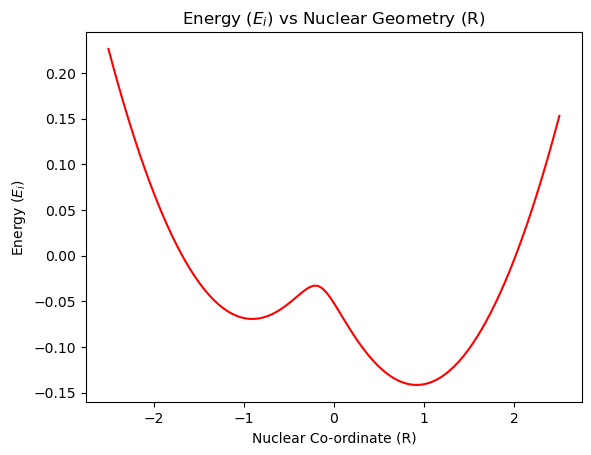

In [8]:
import matplotlib.pyplot as plt

# Creating the x and y values for the plot
R_range = np.linspace(-2.5,2.5,100) # Setting the range for the nuclear co-ordinates R 
E_values = sbh_energy(R_range) # Creating energy values for R

plt.plot(R_range, E_values, color='red') # Plots Nuclear co-ords vs Energy with cosmetic customisation
plt.xlabel('Nuclear Co-ordinate (R)') # x axis label
plt.ylabel('Energy $(E_i)$') # y axis label
plt.title('Energy $(E_i)$ vs Nuclear Geometry (R)') # Graph title
plt.show()

$$\;$$
_2.2_: Using the function defined in _1.2_ a plot of Energy Gradient $dE_i$ vs Geometry $R$ is produced.


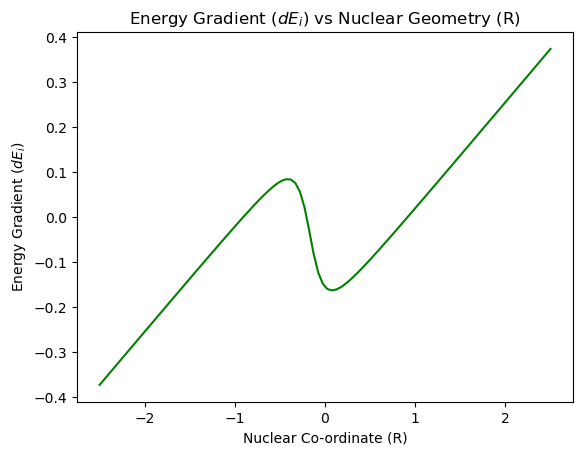

In [10]:
# Creating the x and y values for the plot
R_range = np.linspace(-2.5,2.5,100) # Setting the range for the nuclear co-ordinates R
E_gradient = sbh_dE_dR(R_range) # Creating energy gradient values for R

plt.plot(R_range, E_gradient, color = 'green') # Plots Nuclear co-ords vs Energy gradient with cosmetic customisation
plt.xlabel('Nuclear Co-ordinate (R)') # x axis label - single co-ord due to 1D
plt.ylabel('Energy Gradient $(dE_i)$') # y axis label
plt.title('Energy Gradient $(dE_i)$ vs Nuclear Geometry (R)') # Graph title
plt.show()

$$\;$$
_2.3_: Playing with the parameters.

Increasing the following **$ M_1 $**, **$ \varepsilon_0 $**, **$ \nu_0 $**, **$ \omega_1 $**, **$g_1$**:
causes the energy barries inbetween the two potential wells to decrease, essentially the wells will join for a high enough value of $ M_1 $. This decrease in the energy barrier causes the $dE_i$ vs $R$ plot to tend to linearity. 

$ \varepsilon_0 $ is a function which contains and is proportional to $ M_1 $, $ \nu_0 $, $ \omega_1 $, $g_1$. Each parameter exhibits a similar trend when being increased or decreased due to the energy differece between the two quantum states being equal to $ 2 \varepsilon_0 $.  Here, the two quantum states displays the spins of the particle, where a change in the value of any of these parameters will cause one quantum spin state to be favoured relative to the other. As a result, this alters the probablilty distrubution and energy differences between these states.


$$\;$$
**Task 3**: $$\;$$
Determine approximately $ (R_1,R_2) $ for the two minima of the plot in 2.1.

Here the linspace is visually reduced for each minima and then approximated.


_3.1_ Approximating the left minimum 

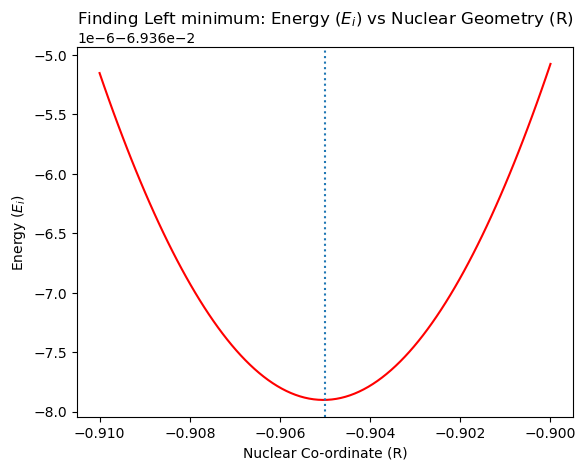

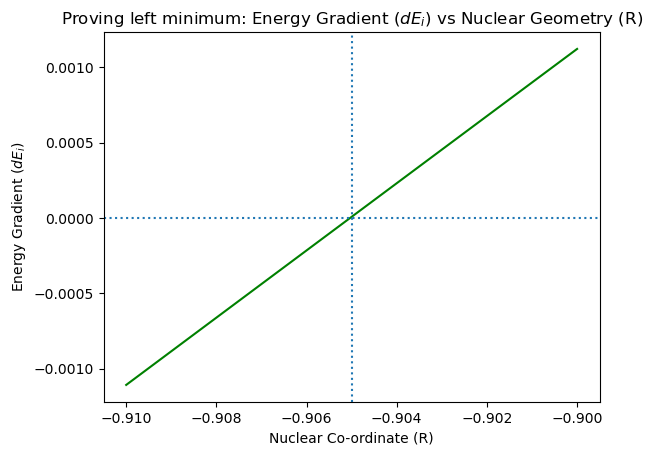

In [14]:
# Creating the x and y values for the plot
R_range = np.linspace(-0.9,-0.91,100) # Reducing Linspace to find the left minimum
E_values = sbh_energy(R_range) # Creating energy values for R
E_gradient = sbh_dE_dR(R_range) # Creating energy gradient values for R

plt.plot(R_range, E_values, color='red') # Plots Nuclear co-ords vs Energy with cosmetic customisation
plt.xlabel('Nuclear Co-ordinate (R)') # x axis label
plt.ylabel('Energy $(E_i)$') # y axis label
plt.title('Finding Left minimum: Energy $(E_i)$ vs Nuclear Geometry (R)') # Graph title
plt.axvline(x=-0.905, linestyle = 'dotted') # Used to clearly approximately display minimum
plt.show()

plt.plot(R_range, E_gradient, color = 'green') # Plots Nuclear co-ords vs Energy gradient with cosmetic customisation
plt.xlabel('Nuclear Co-ordinate (R)') # x axis label - single co-ord due to 1D
plt.ylabel('Energy Gradient $(dE_i)$') # y axis label
plt.title('Proving left minimum: Energy Gradient $(dE_i)$ vs Nuclear Geometry (R)') # Graph title
plt.axhline(y=0, linestyle="dotted", label="R_1 left min")
plt.axvline(x=-0.905, linestyle = 'dotted') # Used to clearly approximately display minimum
plt.show()

$$\;$$
_3.2_ Approximating the right minimum 

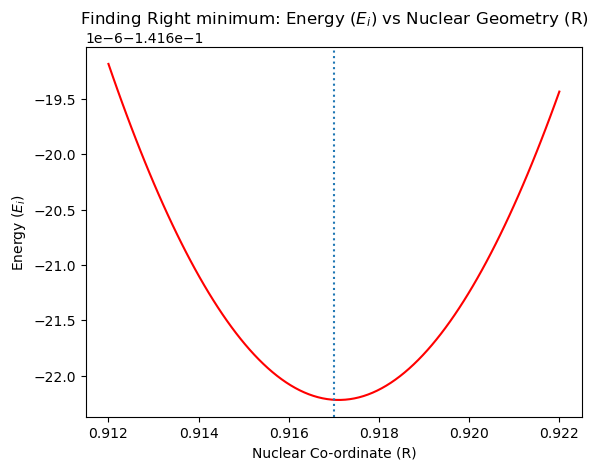

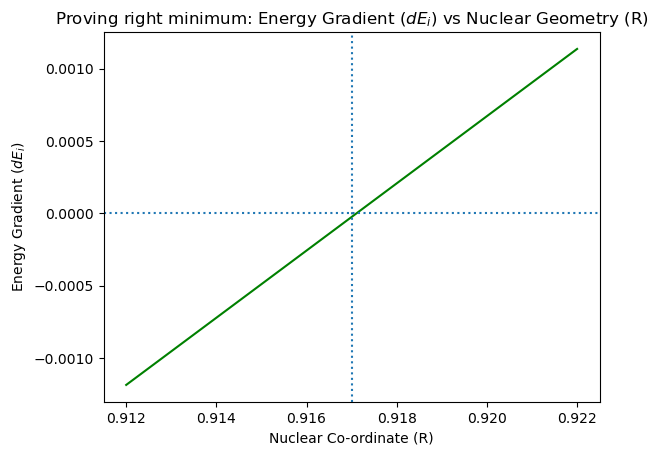

In [16]:
# Creating the x and y values for the plot
R_range = np.linspace(0.912,0.922,100) # Reducing Linspace to find the right minimum
E_values = sbh_energy(R_range) # Creating energy values for R
E_gradient = sbh_dE_dR(R_range) # Creating energy gradient values for R

plt.plot(R_range, E_values, color='red') # Plots Nuclear co-ords vs Energy with cosmetic customisation
plt.xlabel('Nuclear Co-ordinate (R)') # x axis label
plt.ylabel('Energy $(E_i)$') # y axis label
plt.title('Finding Right minimum: Energy $(E_i)$ vs Nuclear Geometry (R)') # Graph title
plt.axvline(x=0.917, linestyle = 'dotted') # Used to approximately display right minimum
plt.show()

plt.plot(R_range, E_gradient, color = 'green') # Plots Nuclear co-ords vs Energy gradient with cosmetic customisation
plt.xlabel('Nuclear Co-ordinate (R)') # x axis label - single co-ord due to 1D
plt.ylabel('Energy Gradient $(dE_i)$') # y axis label
plt.title('Proving right minimum: Energy Gradient $(dE_i)$ vs Nuclear Geometry (R)') # Graph title
plt.axhline(y=0, linestyle="dotted")
plt.axvline(x=0.917, linestyle = 'dotted') # Used to clearly approximately display minimum
plt.show()

$$\;$$
_3.3_ Approximating transition energy barrier - local maximum 

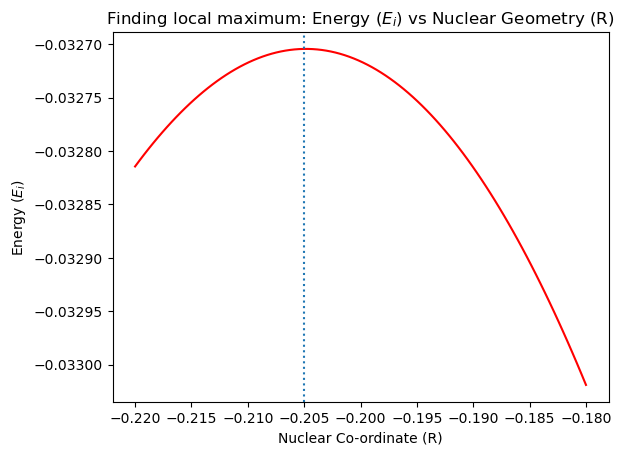

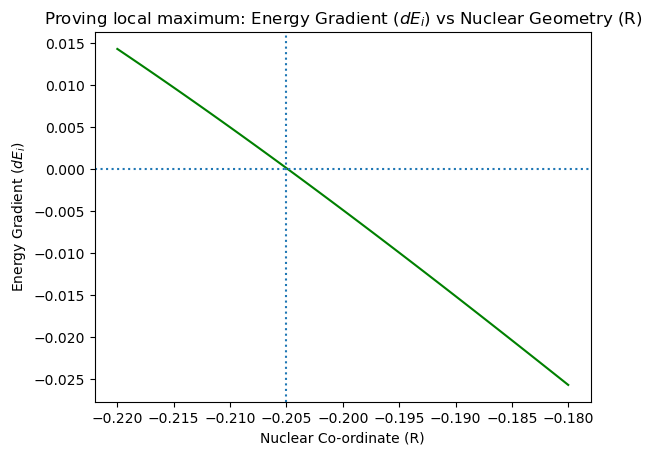

In [18]:
# Creating the x and y values for the plot
R_range = np.linspace(-0.18,-0.22,100) # Reducing Linspace to find the local maximum
E_values = sbh_energy(R_range) # Creating energy values for R
E_gradient = sbh_dE_dR(R_range) # Creating energy gradient values for R

plt.plot(R_range, E_values, color='red') # Plots Nuclear co-ords vs Energy with cosmetic customisation
plt.xlabel('Nuclear Co-ordinate (R)') # x axis label
plt.ylabel('Energy $(E_i)$') # y axis label
plt.title('Finding local maximum: Energy $(E_i)$ vs Nuclear Geometry (R)') # Graph title
plt.axvline(x=-0.205, linestyle = 'dotted') # Used to approximately display local maximum
plt.show()

plt.plot(R_range, E_gradient, color = 'green') # Plots Nuclear co-ords vs Energy gradient with cosmetic customisation
plt.xlabel('Nuclear Co-ordinate (R)') # x axis label - single co-ord due to 1D
plt.ylabel('Energy Gradient $(dE_i)$') # y axis label
plt.title('Proving local maximum: Energy Gradient $(dE_i)$ vs Nuclear Geometry (R)') # Graph title
plt.axhline(y=0, linestyle="dotted")
plt.axvline(x=-0.205, linestyle = 'dotted') # Used to clearly approximately display maximum
plt.show()

$$\;$$
From the approximatations above we can estimate the value of each minimum and their respective SBH energies $ (R_1, R_2) $.

$R_1: ~ -0.905 \; a.u $ $\;$ $\;$ $\;$ $\;$ $\;$ $E_1: ~ -0.0694 \; Hartree $


$R_2: ~ 0.917 \; a.u $ $\;$ $\;$ $\;$ $\;$ $\;$ $\;$ $\;$ $E_2: ~ -0.142 \; Hartree $

The local maximum can be found to be at $ R_3 $, with a respective energy of $ E_3 $,

$R_3: ~ -0.205 \; a.u $ $\;$ $\;$ $\;$ $\;$ $\;$ $E_3: ~ -0.0327 \; Hartree $

Using these values we can approximate the minimum energy needed to hop between minimums,

 $ 1) $ Hop from $ R_1 $ to $ R_2 $: $ --> (E_3 - E_1) = 0.0367 \; Hartree $
 
 $ 2) $ Hop from $ R_2 $ to $ R_1 $: $ --> (E_3 - E_2) = 0.1093 \; Hartree $

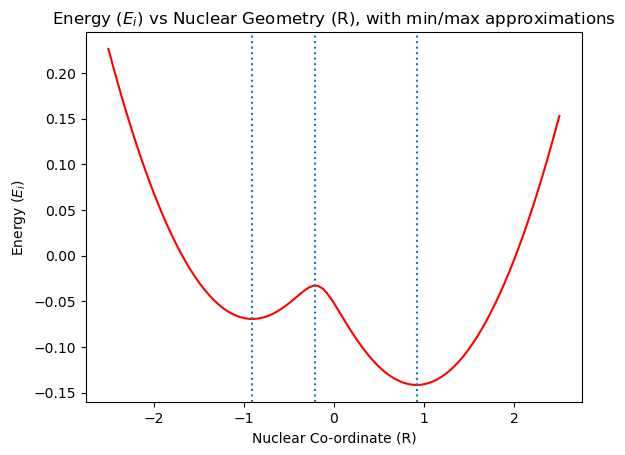

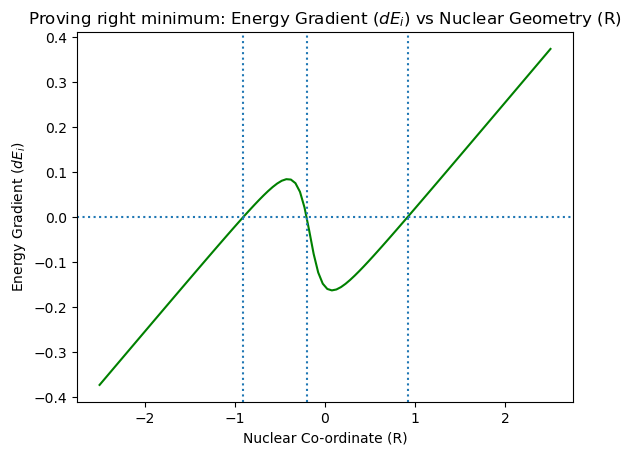

In [20]:
# Creating the x and y values for the plot
R_range = np.linspace(-2.5,2.5,100) # Reducing Linspace to find the right minimum
E_values = sbh_energy(R_range) # Creating energy values for R
E_gradient = sbh_dE_dR(R_range) # Creating energy gradient values for R

plt.plot(R_range, E_values, color='red') # Plots Nuclear co-ords vs Energy with cosmetic customisation
plt.xlabel('Nuclear Co-ordinate (R)') # x axis label
plt.ylabel('Energy $(E_i)$') # y axis label
plt.title('Energy $(E_i)$ vs Nuclear Geometry (R), with min/max approximations') # Graph title
plt.axvline(x=0.917, linestyle = 'dotted') # Used to approximately display right minimum
plt.axvline(x=-0.905, linestyle = 'dotted') # Used to approximately display left minimum
plt.axvline(x=-0.205, linestyle = 'dotted') # Used to clearly approximately display maximum
plt.show()

plt.plot(R_range, E_gradient, color = 'green') # Plots Nuclear co-ords vs Energy gradient with cosmetic customisation
plt.xlabel('Nuclear Co-ordinate (R)') # x axis label - single co-ord due to 1D
plt.ylabel('Energy Gradient $(dE_i)$') # y axis label
plt.title('Proving right minimum: Energy Gradient $(dE_i)$ vs Nuclear Geometry (R)') # Graph title
plt.axvline(x=0.917, linestyle = 'dotted') # Used to clearly approximately display right minimum
plt.axvline(x=-0.905, linestyle = 'dotted') # Used to approximately display left minimum
plt.axvline(x=-0.205, linestyle = 'dotted') # Used to clearly approximately display maximum
plt.axhline(y=0, linestyle="dotted")
plt.show()